#### Needed libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score, classification_report, confusion_matrix
import warnings
warnings.simplefilter("ignore")

#### Exploratory Data Analysis (EDA) 

In [2]:
#Load dataset
df = pd.read_csv(r'E:\GitHub profile Assignments\insurance_claims.csv')

In [3]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [4]:
# Shape of data
df.shape

(1000, 40)

In [5]:
#checking datatypes
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [6]:
# Non null values, data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
# Statistical description of the numerical variables
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

In [8]:
# Check for missing values

df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
# variable _c39 has 1000 missing values and has to be dropped

df.drop('_c39', inplace=True, axis=1)

In [10]:
# Unique value count of each categorical feature

df1 = df.select_dtypes(include=[object])
print(df1.nunique())

policy_bind_date            951
policy_state                  3
policy_csl                    3
insured_sex                   2
insured_education_level       7
insured_occupation           14
insured_hobbies              20
insured_relationship          6
incident_date                60
incident_type                 4
collision_type                4
incident_severity             4
authorities_contacted         5
incident_state                7
incident_city                 7
incident_location          1000
property_damage               3
police_report_available       3
auto_make                    14
auto_model                   39
fraud_reported                2
dtype: int64


#### Data Visualization 

In [11]:
# histogram of Fraud_reported

px.histogram(df, x="fraud_reported",color='fraud_reported',title="Fraud_reported")

In [12]:
# Pie chart of fraud reported

label_cnts = df.fraud_reported.value_counts()

# Plot value_counts
px.pie(names = ["No Fraud Reported", "Fraud Reported"],values = label_cnts.values,title="Fraud reported")


In [13]:
# Histogram of incident type

px.histogram(df,"incident_type", color= "fraud_reported", title="Incident type")

People with incident type Single Vehicle Collision and Multi Vehicle Collision filed the highest claims

Single Vehicle collision and Multi-Vehicle Collision have more fraudulent claims than any other claim_type

In [14]:
# Histogram of insured sex

px.histogram(df,"insured_sex",color="fraud_reported",title="Insured sex ")

In [15]:
# Pie chart of incident type with frauds reported

insured_sex_count = df.insured_sex.value_counts()
# Plot value_counts
px.pie(names = insured_sex_count.index,values = insured_sex_count.values,title="Sex type per fraudulent claims",height=700,width=700)

In [16]:
# Histogram of eductional level


px.histogram(df, x = "insured_education_level",color="fraud_reported",title="education level")

In [17]:
df2 = df[df.fraud_reported=='Y']

In [18]:
# Pie chart of insured education level according to fraud reported


insured_education_level_count = df2.insured_education_level.value_counts()
# Plot value_counts
px.pie(names = insured_education_level_count.index,values = insured_education_level_count.values,title="insured education level according to fraudulent reported",height=700,width=700)

Those with the educational level equal to Juris Doctor (JD) have the highest fraud reported claims

In [19]:
# Incident severity


px.histogram(df, x = "incident_severity",color="fraud_reported",title="incident severity")

Those with Minor Damge filed more claims while those with major damage had more fraudulent claims

In [20]:
# Pie chart of incident severity according to fraud reported

incident_severity_count = df2.incident_severity.value_counts()
# Plot value_counts
px.pie(names = incident_severity_count.index,values = incident_severity_count.values,title="incident severity according to fraud",height=700,width=700)

People with major damage incidents filed more fraudulent claims

In [21]:
# hsitogram of insured occupation

px.histogram(df,"insured_occupation",color="fraud_reported",title="Insured occupation")

In [22]:
# Pie chart of insured occupation according to fraud reported

insured_occupation_count = df2.insured_occupation.value_counts()
# Plot value_counts
px.pie(names = insured_occupation_count.index,values = insured_occupation_count.values,title="insured occupation according to fraud",height=700,width=700)

claimants who hold exec managerial positions filed more frudulent claims

In [23]:
# Histogram of authorities contacted

px.histogram(df,"authorities_contacted",color="fraud_reported",title="Authorities contacted")

In [24]:
# Pie chart of insured occupation according to fraud reported

authorities_contacted_count = df2.authorities_contacted.value_counts()
# Plot value_counts
px.pie(names = authorities_contacted_count.index,values = authorities_contacted_count.values,title="Authorities contacted according to fraud",height=700,width=700)

Those with others committed more fraud

In [25]:
# boxplot of age according to fraud_reported

px.box(df,y="age",title="Age")

In [26]:
# boxplot of age according to fraud_reported

px.box(df,y="age", color="fraud_reported",title="Age per fraud")

In [27]:
# boxplot of age according to fraud_reported

px.box(df,y="total_claim_amount",title="Total claim amount")

In [28]:
# Box plot of months as customer

px.box(df,y="months_as_customer",title="months_as_customer")

In [29]:
# boxplot of age according to fraud_reported

px.box(df,y="months_as_customer", color="fraud_reported",title="months_as_customer")

In [30]:
# boxplot of age according to fraud_reported

px.box(df,y="witnesses", color="fraud_reported",title="witnesses")

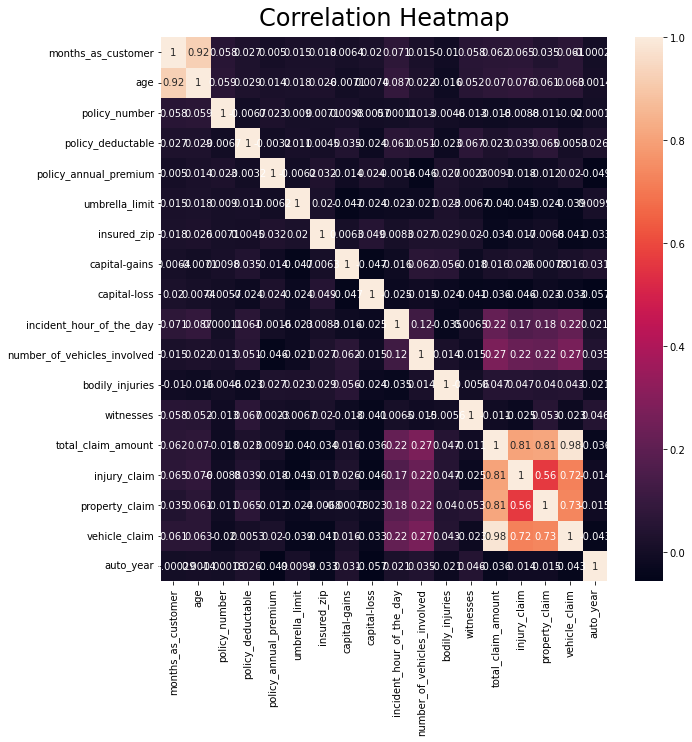

In [31]:
# Correlation plot

corr= df.corr()
#heat map of correlation
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap', fontdict={'fontsize':24}, pad=12)
plt.show()

### Data Preprocessing 

In [32]:
df.sample(10)

months_as_customer  age  policy_number policy_bind_date policy_state  \
12                   60   23         842643       1997-11-20           OH   
25                    8   35         699044       2013-12-05           OH   
13                  121   34         626808       2012-10-26           OH   
893                  41   33         164464       2010-09-26           OH   
835                 370   55         528259       2012-12-22           IN   
927                 156   32         449263       1992-03-20           IL   
86                  153   34         798177       2006-03-04           IL   
710                 234   44         442494       2002-06-06           IN   
739                 194   34         884365       1994-05-17           IN   
303                 267   40         426708       2009-10-09           IL   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
12    500/1000                500                1215.36         3000000   
25     100/300               2000                1266.92               0   
13     100/300               1000                 936.61               0   
893    250/500                500                1294.41               0   
835   500/1000               2000                1389.13         7000000   
927    250/500                500                1479.48               0   
86    500/1000               1000                 873.64         4000000   
710   500/1000                500                1780.67               0   
739    100/300               1000                1423.34               0   
303    250/500                500                1155.53         5000000   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
12        432220  ...         0                      NO              56520   
25        613982  ...         3                     YES              71500   
13        464652  ...         1                      NO               7280   
893       476315  ...         0                       ?               8970   
835       456203  ...         2                       ?               9000   
927       444413  ...         3                     YES              74690   
86        432934  ...         1                       ?              68400   
710       465942  ...         0                      NO              70200   
739       454399  ...         3                      NO               9100   
303       465158  ...         2                      NO               5670   

    injury_claim property_claim  vehicle_claim  auto_make  auto_model  \
12          4710           9420          42390       Saab          95   
25         16500          11000          44000       Ford      Escape   
13          1120           1120           5040     Toyota  Highlander   
893         1380           1380           6210      Dodge        Neon   
835          900           1800           6300   Mercedes       ML350   
927         6790          13580          54320      Dodge         RAM   
86         11400          11400          45600       Ford        F150   
710         7020           7020          56160       Ford        F150   
739         1400           1400           6300  Chevrolet      Malibu   
303         1260            630           3780       Ford        F150   

    auto_year fraud_reported  
12       2000              N  
25       2006              Y  
13       2010              N  
893      2011              N  
835      2015              N  
927      2008              Y  
86       2007              N  
710      2012              Y  
739      2003              N  
303      1997              N  

[10 rows x 39 columns]

The data has an unwanted character '?' which needs to be treated

In [33]:
# Dropping unnecessary variables

df = df.drop(columns = ['policy_number', 'policy_bind_date', 'policy_csl','insured_zip', 'incident_date','incident_location', 'policy_state', 'incident_city', 'insured_relationship', 'auto_make', 'auto_model', 'auto_year'])

It is always good to split data before preprocessing to avoid data leakage

In [34]:
# Splitting data into train and test set

df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

In [35]:
df_train = df_train.replace('?',np.NaN)
df_test = df_test.replace('?', np.NaN)

In [36]:
df_train.isnull().sum()

months_as_customer               0
age                              0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 144
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                288
bodily_injuries                  0
witnesses                        0
police_report_available        270
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

In [37]:
# Replacing missing values with a new class 'Missing' 
for col in df_train:
    df_train[col]=df_train[col].fillna('Missing')
    
for col in df_test:
    df_test[col]= df_test[col].fillna('Missing')

In [38]:
df_train.head(5)

months_as_customer  age  policy_deductable  policy_annual_premium  \
687                 194   41                500                1203.81   
500                   1   29                500                 854.58   
332                  85   25                500                1259.02   
979                 229   37               1000                1331.94   
817                 250   42                500                1055.60   

     umbrella_limit insured_sex insured_education_level insured_occupation  \
687               0        MALE                      JD   transport-moving   
500               0      FEMALE                      JD       craft-repair   
332               0      FEMALE                      JD       tech-support   
979               0      FEMALE                 Masters    farming-fishing   
817               0        MALE             High School    exec-managerial   

    insured_hobbies  capital-gains  ...  number_of_vehicles_involved  \
687     video-games          52500  ...                            3   
500       paintball          52200  ...                            1   
332    base-jumping          67000  ...                            1   
979    base-jumping              0  ...                            1   
817       paintball          69500  ...                            1   

    property_damage bodily_injuries witnesses police_report_available  \
687         Missing               0         2                 Missing   
500         Missing               2         3                     YES   
332              NO               2         2                 Missing   
979              NO               0         2                     YES   
817         Missing               1         1                 Missing   

    total_claim_amount  injury_claim  property_claim vehicle_claim  \
687              95900         13700           20550         61650   
500              86790          7890           23670         55230   
332               5640           940             940          3760   
979              54560          9920            9920         34720   
817              74800         13600            6800         54400   

     fraud_reported  
687               N  
500               N  
332               N  
979               N  
817               Y  

[5 rows x 27 columns]

In [39]:
# Separate independent variables from the target variable

y_train= df_train.pop('fraud_reported')
X_train = df_train

y_test = df_test.pop('fraud_reported')
X_test = df_test

In [40]:
# Encoding categroical variable with one hot encoder

X_train = pd.get_dummies(X_train)    # Encoding the train set


X_test = pd.get_dummies(X_test)   # Encoding the test set

In [41]:
X_train.head()

months_as_customer  age  policy_deductable  policy_annual_premium  \
687                 194   41                500                1203.81   
500                   1   29                500                 854.58   
332                  85   25                500                1259.02   
979                 229   37               1000                1331.94   
817                 250   42                500                1055.60   

     umbrella_limit  capital-gains  capital-loss  incident_hour_of_the_day  \
687               0          52500        -51300                        17   
500               0          52200             0                        15   
332               0          67000        -53600                         8   
979               0              0        -55400                        17   
817               0          69500        -40700                        16   

     number_of_vehicles_involved  bodily_injuries  ...  incident_state_PA  \
687                            3                0  ...                  0   
500                            1                2  ...                  0   
332                            1                2  ...                  0   
979                            1                0  ...                  0   
817                            1                1  ...                  0   

     incident_state_SC  incident_state_VA  incident_state_WV  \
687                  0                  0                  1   
500                  1                  0                  0   
332                  1                  0                  0   
979                  0                  0                  0   
817                  1                  0                  0   

     property_damage_Missing  property_damage_NO  property_damage_YES  \
687                        1                   0                    0   
500                        1                   0                    0   
332                        0                   1                    0   
979                        0                   1                    0   
817                        1                   0                    0   

     police_report_available_Missing  police_report_available_NO  \
687                                1                           0   
500                                0                           0   
332                                1                           0   
979                                0                           0   
817                                1                           0   

     police_report_available_YES  
687                            0  
500                            1  
332                            0  
979                            1  
817                            0  

[5 rows x 88 columns]

In [42]:
# encoding the target with label encoding

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

y_train = labelencoder.fit_transform(y_train)

y_test = labelencoder.transform(y_test)

In [43]:
X_train.shape, X_test.shape  # Shape of train and test set

((800, 88), (200, 88))

In [44]:
# Scaling train and test set with MinMaxScaler

# MinMaxScaler transform the variables into a range of [0, 1]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

The dataset is imbalance, SMOTE will help to balance up the classes

In [45]:
# Treating imbalance data in training dataset

from imblearn.over_sampling import SMOTE

from collections import Counter

counter = Counter(y_train)

print('before smoting: ', counter)

smt = SMOTE()

X_train, y_train = smt.fit_resample(X_train, y_train)

counter = Counter(y_train)
print('After smoting: ', counter)

before smoting:  Counter({0: 610, 1: 190})
After smoting:  Counter({0: 610, 1: 610})


### Modeling Building and Evaluation 

I will apply the following supervised learning models.

(1) Logistic Regression

(2) Decision Tree

(3) Random Forest

(4) Gradient Boosting

In [88]:
index = ["LogisticRegression", "DecisionTreeClassifier", "GradientBoostingClassifier", "RandomForestClassifier"]
results = pd.DataFrame(columns=['Accuracy','Precison','Recall', 'f1_score', 'AUC'],index=index)

#### Logistic Regression

Logistic regression is a linear model for classification. It is simple to implement, efficient and fast.

In [89]:
# set tuning paramters
from sklearn.linear_model import LogisticRegression 

LR = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

# Fitting model to train set

LR.fit( X_train, y_train) 

# Checking for overfitting and underfitting

print(" Accuracy on training set: ",  LR.score( X_train, y_train)) 

print(" Accuracy on test set: ", LR.score( X_test, y_test))

 Accuracy on training set:  0.8770491803278688
 Accuracy on test set:  0.855


#### Predction on test set

In [90]:
# Prediction on test set

y_pred = LR.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0
 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0]


Evaluating Model Performance
Model evaluation is the process of evaluating a trained model on the test data set.

Confusion Matrix

A confusion matrix is a table use to evaluate the performance of classification model

It contains the following:

• True Positive (TP): Correct positive prediction

• False Positive (FP): Incorrect positive prediction

• True negative (TN): Correct negative prediction

• False negative (FN): Incorrect negative prediction

Recall or sensitivity: Recall is the true positive predictions out of the total number of actual positive

Recall = TP/ (TP +FN)

Precision: It represent the number of true positive predictions divide by the total number of positive predictions.

Precision= TP/ (TP+FP)

Accuracy: Accuracy is the total number of correct predictions divide by the total predictions

Accuracy = (TP+TN) / (TP+TN+FN+FP)

f1_score: It is the harmonic mean of recall and precision.

f1_score = (2X Precision X Recall)/ (Precision + Recall)

Area Under Curve (AUC)

It represents the area under the ROC curve. An ROC curve is a plot of false positive rate on the x-axis and true positive rate on the y-axis

In [91]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[123,  20],
       [  9,  48]], dtype=int64)

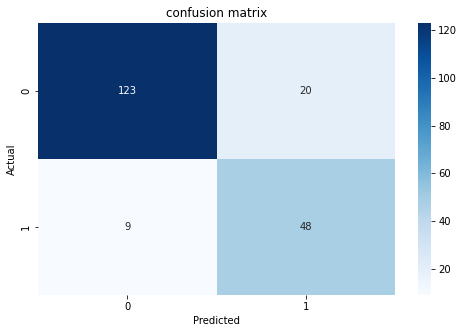

In [92]:
# Heatmap

plt.figure(figsize=(8, 5))
sns.heatmap(cm, cmap= 'Blues', linecolor='black', fmt='', annot=True)
plt.title('confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [93]:
# Accuracy of test

from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

rec = recall_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
f1_sc =  f1_score(y_test, y_pred)

print("Accuracy :: ",acc)
print("Precision :: ",pre)
print("Recall :: ", rec)
print("f1_score", f1_sc)

Accuracy ::  0.855
Precision ::  0.7058823529411765
Recall ::  0.8421052631578947
f1_score 0.7679999999999999


auc:  0.8545577229787755


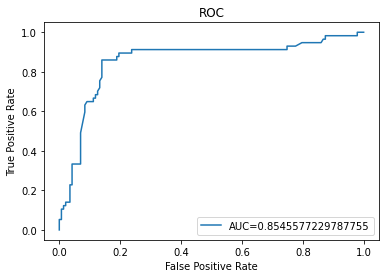

In [94]:
# ROC Curve, AUC

from sklearn import metrics

y_pred_proba = LR.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('auc: ', auc)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.legend(loc=4)
plt.show()

In [95]:
# calssification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       143
           1       0.71      0.84      0.77        57

    accuracy                           0.85       200
   macro avg       0.82      0.85      0.83       200
weighted avg       0.87      0.85      0.86       200



In [96]:
results.loc["LogisticRegression"] = [acc,pre,rec, f1_sc, auc]

#### Decision Tree

Decision trees are a widely used model for classification and regression problems. A decision tree is made up of the decision node and leaf node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.

In [97]:
# set tuning paramters

tree = DecisionTreeClassifier(max_depth=2, random_state=0) 

# Fitting model to train set

tree.fit( X_train, y_train) 

# Checking for overfitting and underfitting

print(" Accuracy on training set: ",  tree.score( X_train, y_train)) 

print(" Accuracy on test set: ", tree.score( X_test, y_test))

 Accuracy on training set:  0.8778688524590164
 Accuracy on test set:  0.835


In [98]:
# Prediction on test set

y_pred1 = tree.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0
 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0]


In [99]:
rec1 = recall_score(y_test, y_pred1)
pre1 = precision_score(y_test, y_pred1)
acc1 = accuracy_score(y_test, y_pred1)
f1_sc1 =  f1_score(y_test, y_pred1)

print("Accuracy :: ",acc1)
print("Precision :: ",pre1)
print("Recall :: ", rec1)
print("f1_score", f1_sc1)

Accuracy ::  0.835
Precision ::  0.6875
Recall ::  0.7719298245614035
f1_score 0.7272727272727273


In [100]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[123,  20],
       [  9,  48]], dtype=int64)

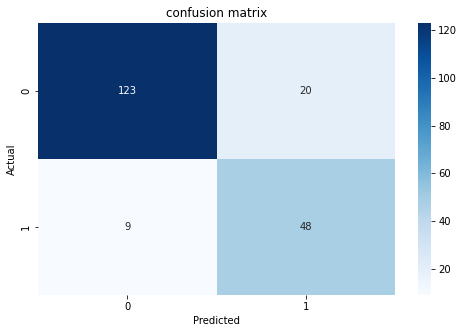

In [101]:
# Heatmap

plt.figure(figsize=(8, 5))
sns.heatmap(cm, cmap= 'Blues', linecolor='black', fmt='', annot=True)
plt.title('confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

auc:  0.8545577229787755


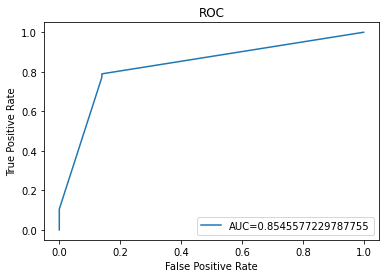

In [102]:
# ROC Curve, AUC

from sklearn import metrics

y_pred_proba = tree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba)
print('auc: ', auc)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.legend(loc=4)
plt.show()

In [103]:
# calssification report

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       143
           1       0.69      0.77      0.73        57

    accuracy                           0.83       200
   macro avg       0.80      0.82      0.80       200
weighted avg       0.84      0.83      0.84       200



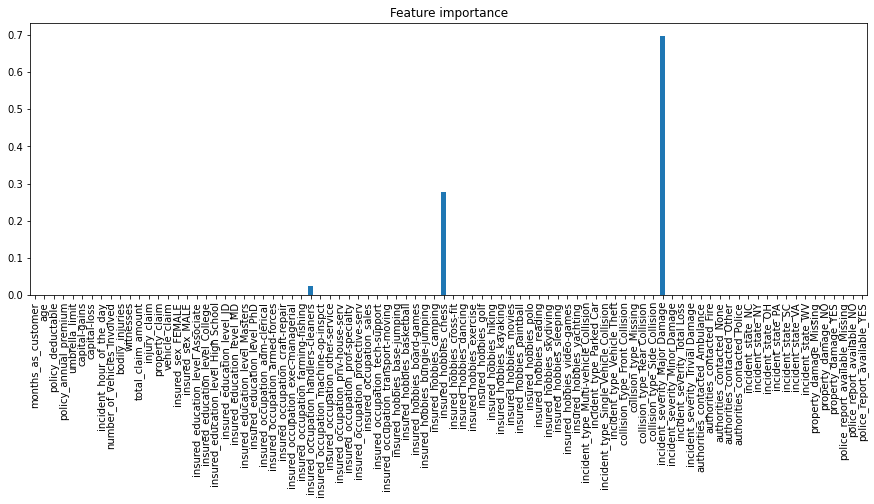

In [104]:
# Feature importance

plt.figure(figsize=(15, 5))
importances = tree.feature_importances_
feature_importance = pd.Series(importances, index = X_train.columns)
feature_importance.plot(kind='bar')
plt.title('Feature importance')
plt.show()

In [105]:
results.loc["DecisionTreeClassifier"] = [acc1,pre1,rec1, f1_sc1, auc1]

#### Random Forest

A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data. If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results.

In [106]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(max_depth=2, n_estimators=5, random_state=0)

# Fitting model to train set

RF.fit( X_train, y_train) 

# Checking for overfitting and underfitting

print(" Accuracy on training set: ",  RF.score( X_train, y_train)) 

print(" Accuracy on test set: ", RF.score( X_test, y_test))

 Accuracy on training set:  0.8581967213114754
 Accuracy on test set:  0.835


In [107]:
# Prediction on test set

y_pred3 = RF.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0
 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0]


In [108]:
rec2 = recall_score(y_test, y_pred3)
pre2 = precision_score(y_test, y_pred3)
acc2 = accuracy_score(y_test, y_pred3)
f1_sc2 =  f1_score(y_test, y_pred3)

print("Accuracy :: ",acc2)
print("Precision :: ",pre2)
print("Recall :: ", rec2)
print("f1_score", f1_sc2)

Accuracy ::  0.835
Precision ::  0.6875
Recall ::  0.7719298245614035
f1_score 0.7272727272727273


In [109]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred3)
cm

array([[123,  20],
       [ 13,  44]], dtype=int64)

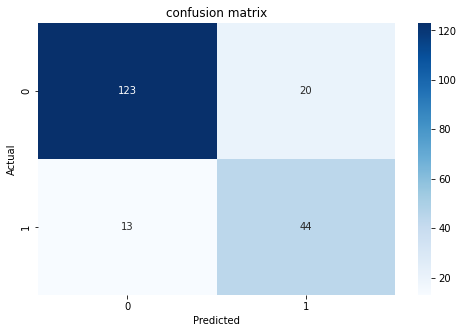

In [110]:
# Heatmap

plt.figure(figsize=(8, 5))
sns.heatmap(cm, cmap= 'Blues', linecolor='black', fmt='', annot=True)
plt.title('confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

auc:  0.8545577229787755


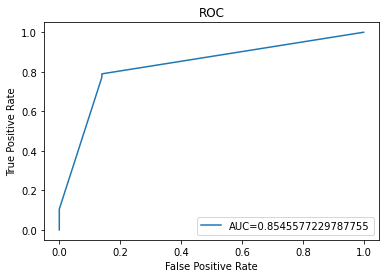

In [111]:
# ROC Curve, AUC

from sklearn import metrics

y_pred_proba = tree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba)
print('auc: ', auc)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.legend(loc=4)
plt.show()

In [112]:
# calssification report

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       143
           1       0.69      0.77      0.73        57

    accuracy                           0.83       200
   macro avg       0.80      0.82      0.80       200
weighted avg       0.84      0.83      0.84       200



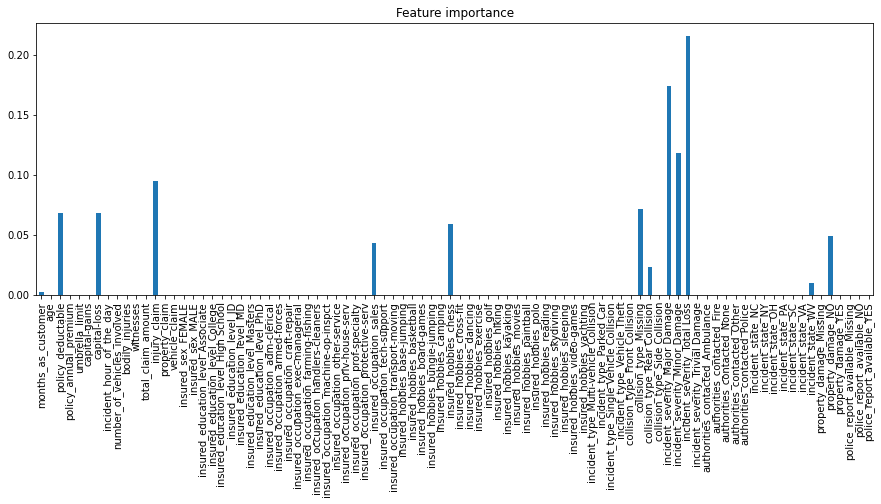

In [113]:
# Feature importance

plt.figure(figsize=(15, 5))
importances = RF.feature_importances_
feature_importance = pd.Series(importances, index = X_train.columns)
feature_importance.plot(kind='bar')
plt.title('Feature importance')
plt.show()

In [114]:
results.loc["RandomForestClassifier"] = [acc2,pre2,rec2, f1_sc2, auc2]

#### Gradient Boosting

Gradient boosting machines is an ensemble method that combines multiple decision trees to create a more powerful model. Despite the “regression” in the name, these models can be used for regression and classification.

In [115]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(max_depth=2, learning_rate=0.01, random_state=0)

# Fitting model to train set

gbrt.fit( X_train, y_train) 

# Checking for overfitting and underfitting

print(" Accuracy on training set: ",  gbrt.score( X_train, y_train)) 

print(" Accuracy on test set: ", gbrt.score( X_test, y_test))

 Accuracy on training set:  0.8754098360655738
 Accuracy on test set:  0.84


In [116]:
# Prediction on test set

y_pred4 = gbrt.predict(X_test)
print(y_pred4)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0
 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0]


In [117]:
rec3 = recall_score(y_test, y_pred4)
pre3 = precision_score(y_test, y_pred4)
acc3 = accuracy_score(y_test, y_pred4)
f1_sc3 =  f1_score(y_test, y_pred4)

print("Accuracy :: ",acc)
print("Precision :: ",pre)
print("Recall :: ", rec)
print("f1_score", f1_sc)

Accuracy ::  0.855
Precision ::  0.7058823529411765
Recall ::  0.8421052631578947
f1_score 0.7679999999999999


In [118]:
cm = confusion_matrix(y_test, y_pred4)
cm

array([[123,  20],
       [ 12,  45]], dtype=int64)

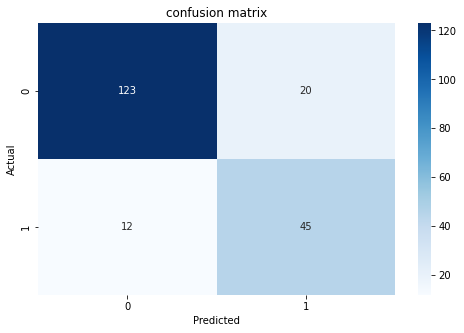

In [119]:
# Heatmap

plt.figure(figsize=(8, 5))
sns.heatmap(cm, cmap= 'Blues', linecolor='black', fmt='', annot=True)
plt.title('confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

auc:  0.8545577229787755


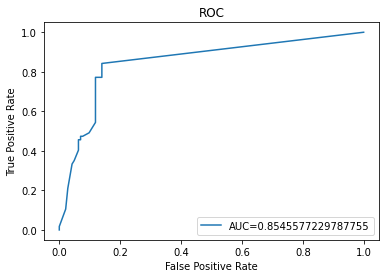

In [120]:
# ROC Curve, AUC

from sklearn import metrics

y_pred_proba = gbrt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba)
print('auc: ', auc)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.legend(loc=4)
plt.show()

In [121]:
# calssification report

print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       143
           1       0.69      0.79      0.74        57

    accuracy                           0.84       200
   macro avg       0.80      0.82      0.81       200
weighted avg       0.85      0.84      0.84       200



In [122]:
results.loc["GradientBoostingClassifier"] = [acc3,pre3,rec3, f1_sc3, auc3]

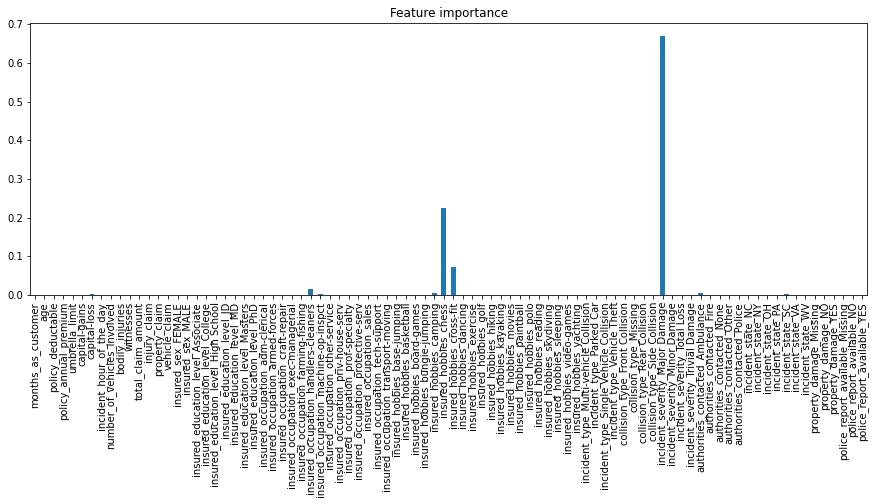

In [123]:
# Feature importance

plt.figure(figsize=(15, 5))
importances = gbrt.feature_importances_
feature_importance = pd.Series(importances, index = X_train.columns)
feature_importance.plot(kind='bar')
plt.title('Feature importance')
plt.show()

### Model Comparison 

In [124]:
results = results*100
results

Accuracy   Precison     Recall   f1_score  \
LogisticRegression             85.5  70.588235  84.210526       76.8   
DecisionTreeClassifier         83.5      68.75  77.192982  72.727273   
GradientBoostingClassifier     84.0  69.230769  78.947368  73.770492   
RandomForestClassifier         83.5      68.75  77.192982  72.727273   

                                  AUC  
LogisticRegression          85.455772  
DecisionTreeClassifier      83.094099  
GradientBoostingClassifier  84.977303  
RandomForestClassifier      83.094099

In [125]:
px.bar(results,y ="Accuracy",x = results.index,color = results.index,title="Accuracy Comparison")


In [126]:
px.bar(results,y ="Precison",x = results.index,color = results.index,title="Precision Comparison")

In [127]:
px.bar(results,y ="Recall",x = results.index,color = results.index,title="Recall Comparison")

In [128]:
px.bar(results,y ="f1_score",x = results.index,color = results.index,title="f1_score comparison")